# Mix explicit and implicit scheme



## Nonlinear equations
Burger's equation 

In [1]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spla
from scipy import sparse
import time
from IPython.display import display, clear_output
import finite
import timesteppers_hw5 as timesteppers

## Burgers' Equation

We want to solve the following equation:
$$\partial_t u = - u\partial_x u.$$
The advective term ($-u\partial_x u$) is nonlinear, so we must treat it explicitly. We will try Forward Euler, and also Lax-Freidrich.

In [7]:
grid = finite.UniformPeriodicGrid(400, 2*np.pi)
x = grid.values

# Initial condition 
IC = 0*x
for i, xx in enumerate(x):
    if xx > 1 and xx <= 2:
        IC[i] = (xx-1)
    elif xx > 2 and xx < 3:
        IC[i] = (3-xx)
        
x_s = 1+np.sqrt(2+2*3)

sol = 0*x
for i, xx in enumerate(x):
    if xx > 1 and xx <= x_s:
        sol[i] = 2/(x_s-1)**2*(xx-1)
        
d = finite.DifferenceUniformGrid(1, 2, grid)
# explicit timestepping scheme, works for the nonlinear term.
f = lambda u: -u * (d @ u)

/Users/ericchen/opt/anaconda3/envs/446/lib/python3.12/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


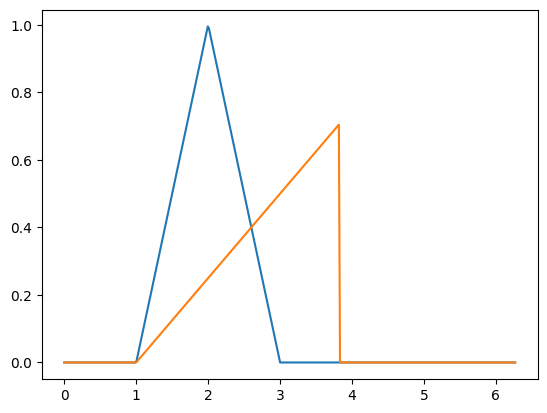

In [3]:
plt.figure()
plt.plot(x, IC)
plt.plot(x, sol)

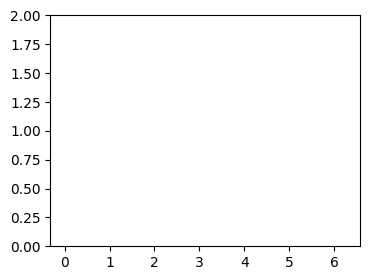

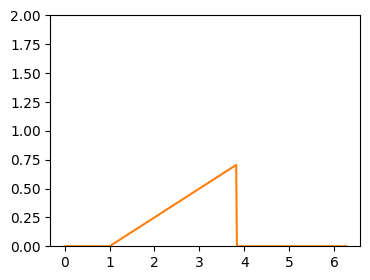

In [8]:
ts = timesteppers.ForwardEuler(IC, f)
alpha = 0.5
dt = alpha*grid.dx
output_cadence = 4

fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, ts.u)
plt.ylim([0,2])
while ts.t < 3:
    ts.step(dt)
    if ts.iter % output_cadence == 0:
        p.set_ydata(ts.u)
        clear_output(wait=True)
        display(fig)
plt.plot(x, sol)

In [13]:
ts.u

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

<IPython.core.display.Javascript object>


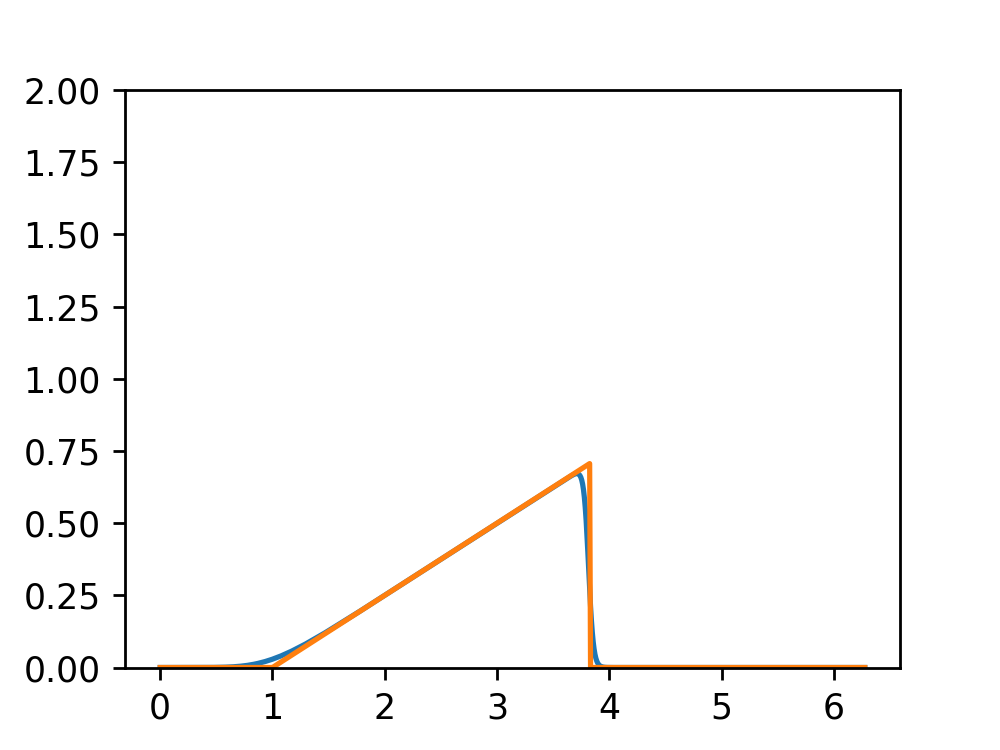

In [20]:
ts = timesteppers.LaxFriedrichs(IC, f)
alpha = 0.5
dt = alpha*grid.dx
output_cadence = 4

fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, ts.u)
plt.ylim([0,2])
fig.canvas.draw()
while ts.t < 3:
    ts.step(dt)
    if ts.iter % output_cadence == 0:
        p.set_ydata(ts.u)
        fig.canvas.draw()
plt.plot(x, sol)

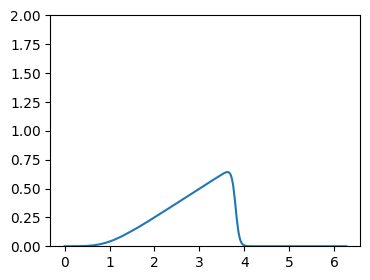

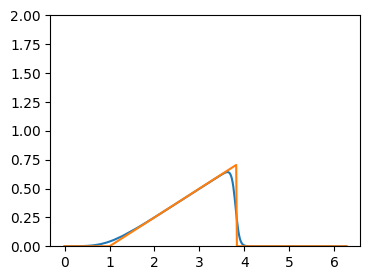

In [5]:
ts = timesteppers.LaxFriedrichs(IC, f)
alpha = 0.5
dt = alpha*grid.dx
output_cadence = 2

fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, ts.u)
plt.ylim([0,2])
while ts.t < 3:
    ts.step(dt)
    if ts.iter % output_cadence == 0:
        p.set_ydata(ts.u)
        clear_output(wait=True)
        display(fig)
plt.plot(x, sol)

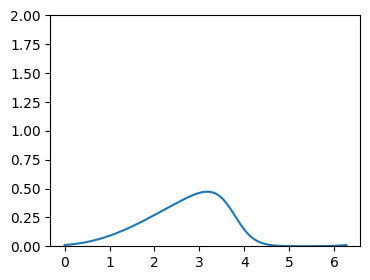

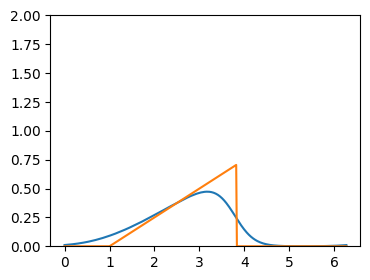

In [6]:
ts = timesteppers.LaxFriedrichs(IC, f)
alpha = 0.1
dt = alpha*grid.dx
output_cadence = 10

fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, ts.u)
plt.ylim([0,2])
while ts.t < 3:
    ts.step(dt)
    if ts.iter % output_cadence == 0:
        p.set_ydata(ts.u)
        clear_output(wait=True)
        display(fig)
plt.plot(x, sol)